In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [18]:
import sqlite3

conn = sqlite3.connect(r"..\db.sqlite3")
query = """
SELECT  order_id, datetime, product_id, quantity, name, price
FROM restaurant_order 
INNER JOIN restaurant_orderitem 
ON restaurant_order.id=restaurant_orderitem.order_id
INNER JOIN restaurant_product
ON restaurant_product.id=restaurant_orderitem.product_id
"""

df = pd.read_sql_query(query, conn)
df.to_csv("restaurant_combined_data.csv")
conn.close()
df = pd.read_csv("restaurant_combined_data.csv")
print(len(df))

74818


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

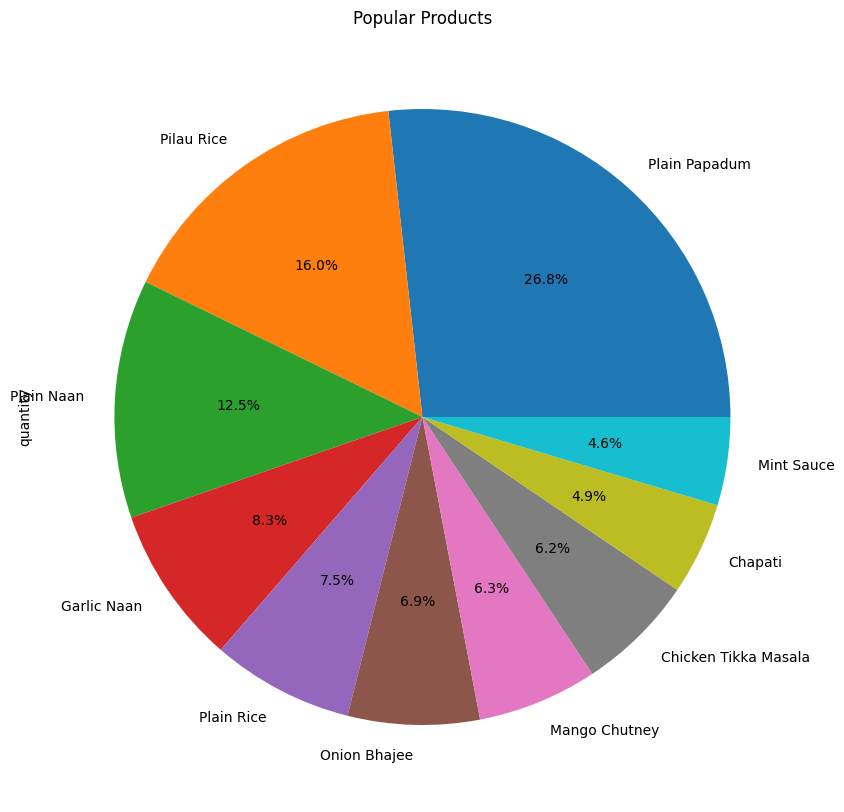

In [33]:
popular_products = df.groupby("name")["quantity"].sum().nlargest(10)
popular_products.plot(
    kind="pie", autopct="%1.1f%%", figsize=(10, 10), title="Popular Products"
)
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

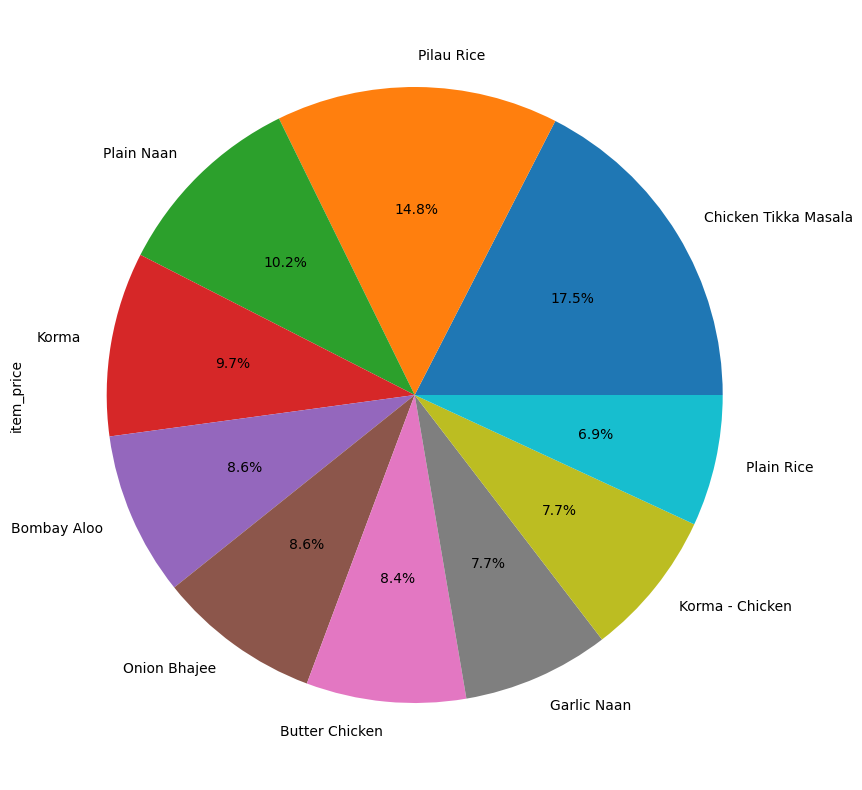

In [38]:
df["item_price"] = df["price"] * df["quantity"]
top_price_of_products = df.groupby("name")["item_price"].sum().nlargest(10)
top_price_of_products.plot(kind="pie", autopct="%1.1f%%", figsize=(10, 10))
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

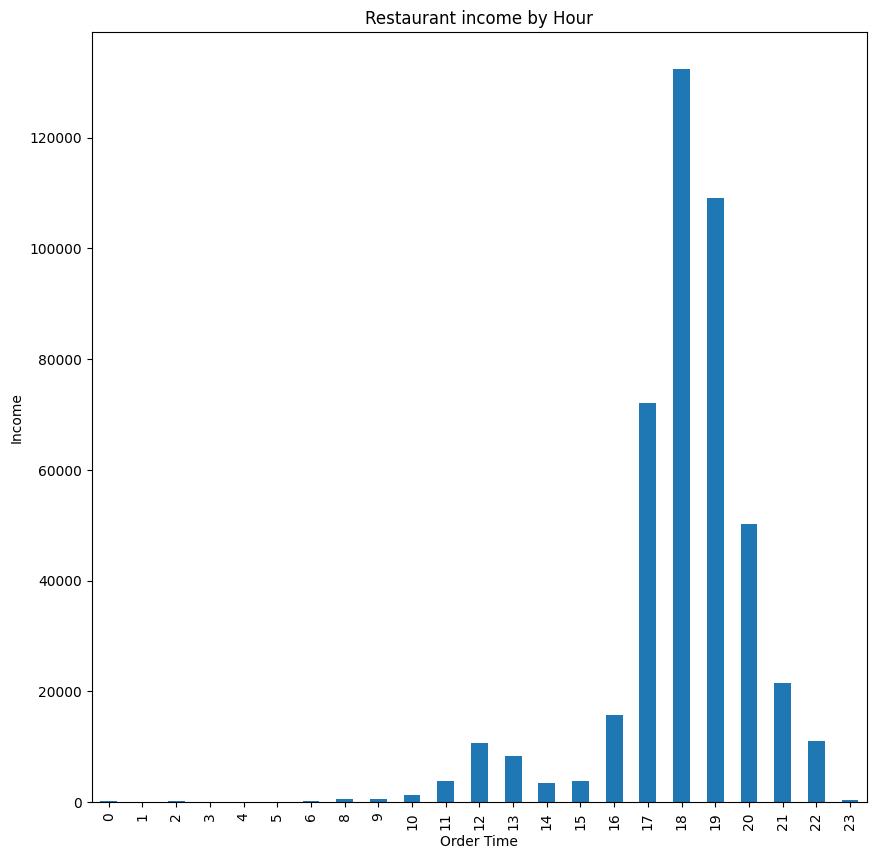

In [43]:
df["order_time"] = pd.to_datetime(df["datetime"]).dt.hour
income_by_hour = df.groupby("order_time")["item_price"].sum()

income_by_hour.plot(kind="bar", figsize=(10, 10), title="Restaurant income by Hour")
plt.xlabel("Order Time")
plt.ylabel("Income")
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

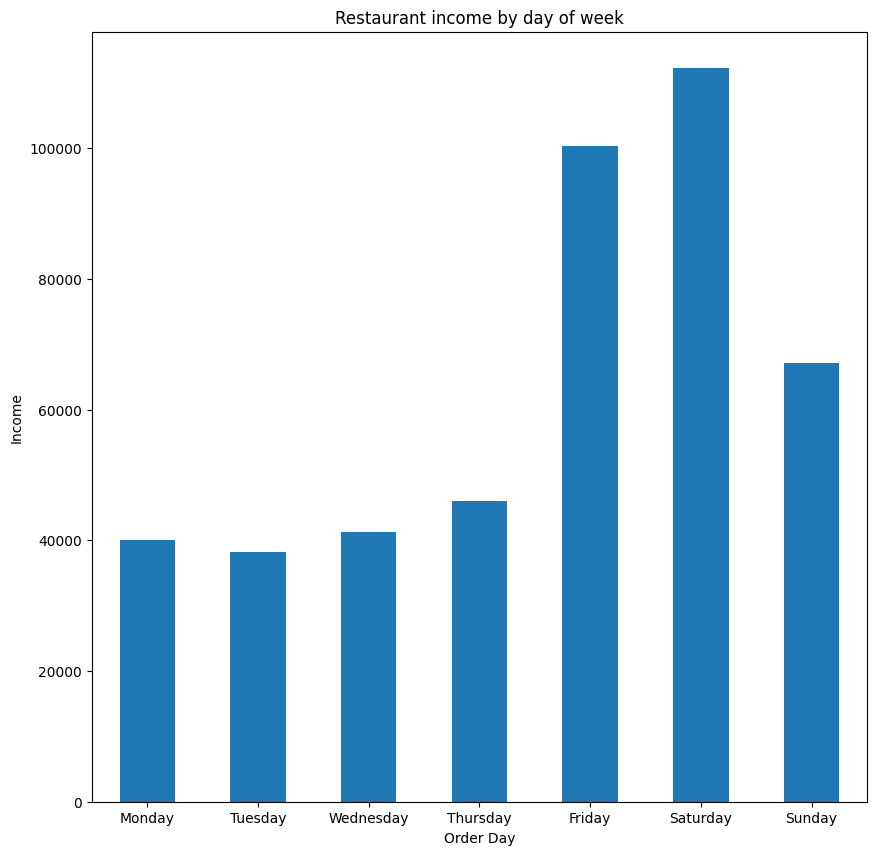

In [47]:
df["order_day"] = pd.to_datetime(df["datetime"]).dt.dayofweek

income_by_week_day = df.groupby("order_day")["item_price"].sum()
days_of_week = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
income_by_week_day.index = days_of_week
income_by_week_day.plot(
    kind="bar", figsize=(10, 10), title="Restaurant income by day of week"
)
plt.xlabel("Order Day")
plt.ylabel("Income")
plt.xticks(rotation=0)
plt.show()